# SkillFactory
## Введение в ML, введение в sklearn

В этом задании мы с вами рассмотрим данные с конкурса [Задача предсказания отклика клиентов ОТП Банка](http://www.machinelearning.ru/wiki/index.php?title=%D0%97%D0%B0%D0%B4%D0%B0%D1%87%D0%B0_%D0%BF%D1%80%D0%B5%D0%B4%D1%81%D0%BA%D0%B0%D0%B7%D0%B0%D0%BD%D0%B8%D1%8F_%D0%BE%D1%82%D0%BA%D0%BB%D0%B8%D0%BA%D0%B0_%D0%BA%D0%BB%D0%B8%D0%B5%D0%BD%D1%82%D0%BE%D0%B2_%D0%9E%D0%A2%D0%9F_%D0%91%D0%B0%D0%BD%D0%BA%D0%B0_%28%D0%BA%D0%BE%D0%BD%D0%BA%D1%83%D1%80%D1%81%29)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

### Грузим данные

Считаем описание данных

In [2]:

df_descr = pd.read_csv('data/otp_description.csv', sep='\t', encoding='utf8',dtype = {'PERSONAL_INCOME': float, 'CREDIT':float})

In [3]:
df_descr

,ПОЛЕ,ОПИСАНИЕ
0,AGREEMENT_RK,уникальный идентификатор объекта в выборке
1,AGE,возраст клиента
2,SOCSTATUS_WORK_FL,социальный статус клиента относительно работы ...
3,SOCSTATUS_PENS_FL,социальный статус клиента относительно пенсии ...
4,GENDER,"пол клиента (1- женщины, 0-мужчины)"
5,CHILD_TOTAL,количество детей клиента
6,DEPENDANTS,количество иждивенцев клиента
7,EDUCATION,образование
8,MARITAL_STATUS,семейное положение
9,GEN_INDUSTRY,отрасль работы клиента


Считаем обучающую выборки и тестовую (которую мы как бы не видим)

In [4]:
df_train = pd.read_csv('data/otp_train.csv', sep='\t', encoding='utf8')

In [5]:
df_train.shape

(15223, 52)

In [6]:
df_test = pd.read_csv('data/otp_test.csv', sep='\t', encoding='utf8')

In [7]:
df_test.shape

(14910, 52)

In [8]:
df_train.head()

,AGREEMENT_RK,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,EDUCATION,MARITAL_STATUS,...,REG_PHONE_FL,GEN_PHONE_FL,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_NUM_PAYM,LOAN_DLQ_NUM,LOAN_MAX_DLQ,LOAN_AVG_DLQ_AMT,LOAN_MAX_DLQ_AMT,PREVIOUS_CARD_NUM_UTILIZED
0,59910150,0,49,1,0,1,2,1,Среднее специальное,Состою в браке,...,0,1,1,1,6,2,1,1580,1580,NaN
1,59910230,0,32,1,0,1,3,3,Среднее,Состою в браке,...,0,1,1,1,6,1,1,4020,4020,NaN
2,59910525,0,52,1,0,1,4,0,Неполное среднее,Состою в браке,...,0,1,2,1,11,0,0,0,0,NaN
3,59910803,0,39,1,0,1,1,1,Высшее,Состою в браке,...,1,1,1,1,6,3,1,"1589,92333333333",1590,NaN
4,59911781,0,30,1,0,0,0,0,Среднее,Состою в браке,...,0,1,2,1,16,2,1,"1152,15",2230,NaN


## Объединим две выборки

Так как пока мы пока не умеем работать sklearn  Pipeline, то для того, чтобы после предобработки столбцы в двух выборках находились на своих местах.

Для того, чтобы в дальнейшем отделить их введем новый столбец "sample"

In [9]:
df_train.loc[:, 'sample'] = 'train'
df_test.loc[:, 'sample'] = 'test'

In [10]:
df = df_test.append(df_train).reset_index(drop=True)

In [11]:
df.shape

(30133, 53)

In [12]:
df.head()

,AGREEMENT_RK,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,EDUCATION,MARITAL_STATUS,...,GEN_PHONE_FL,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_NUM_PAYM,LOAN_DLQ_NUM,LOAN_MAX_DLQ,LOAN_AVG_DLQ_AMT,LOAN_MAX_DLQ_AMT,PREVIOUS_CARD_NUM_UTILIZED,sample
0,59909969,0,30,1,0,1,1,1,Среднее специальное,Не состоял в браке,...,1,2,2,8,0,0,0,0,NaN,test
1,59910420,0,48,0,1,1,0,0,Среднее,Состою в браке,...,0,2,1,15,0,0,0,0,NaN,test
2,59911223,0,35,1,0,0,1,0,Среднее,Не состоял в браке,...,1,1,1,1,0,0,0,0,NaN,test
3,59911322,0,22,1,0,0,0,0,Среднее,Не состоял в браке,...,1,3,2,9,0,0,0,0,NaN,test
4,59911438,0,27,1,0,1,2,2,Высшее,Состою в браке,...,1,1,1,5,0,0,0,0,NaN,test


### Чуть-чуть посмотрим на данные

Посмотрим типы данных и их заполняемость

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Data columns (total 53 columns):
AGREEMENT_RK                  30133 non-null int64
TARGET                        30133 non-null int64
AGE                           30133 non-null int64
SOCSTATUS_WORK_FL             30133 non-null int64
SOCSTATUS_PENS_FL             30133 non-null int64
GENDER                        30133 non-null int64
CHILD_TOTAL                   30133 non-null int64
DEPENDANTS                    30133 non-null int64
EDUCATION                     30133 non-null object
MARITAL_STATUS                30133 non-null object
GEN_INDUSTRY                  27420 non-null object
GEN_TITLE                     27420 non-null object
ORG_TP_STATE                  27420 non-null object
ORG_TP_FCAPITAL               27425 non-null object
JOB_DIR                       27420 non-null object
FAMILY_INCOME                 30133 non-null object
PERSONAL_INCOME               30133 non-null object
REG_ADDRESS_PRO

Видим, что часть данных - object, скорее всего стоки.


Давайте выведем эти значения для каждого столбца

In [14]:
for i in df_train.columns: # перебираем все столбцы
    if str(df_train[i].dtype) == 'object': # если тип столбца - object
        print('='*10)
        print(i) # выводим название столбца
        print(set(df_train[i])) # выводим все его значения (но делаем set - чтоб значения не повторялись)
        print('\n') # выводим пустую строку

EDUCATION
{'Среднее специальное', 'Ученая степень', 'Два и более высших образования', 'Среднее', 'Неполное среднее', 'Неоконченное высшее', 'Высшее'}


MARITAL_STATUS
{'Не состоял в браке', 'Гражданский брак', 'Состою в браке', 'Вдовец/Вдова', 'Разведен(а)'}


GEN_INDUSTRY
{nan, 'Юридические услуги/нотариальные услуги', 'Ресторанный бизнес/Общественное питание', 'Информационные услуги', 'Металлургия/Промышленность/Машиностроение', 'Здравоохранение', 'Образование', 'Строительство', 'Развлечения/Искусство', 'Энергетика', 'Наука', 'Торговля', 'Сборочные производства', 'Сельское хозяйство', 'Недвижимость', 'Подбор персонала', 'Другие сферы', 'Банк/Финансы', 'Логистика', 'Транспорт', 'Туризм', 'Химия/Парфюмерия/Фармацевтика', 'Управляющая компания', 'Маркетинг', 'Информационные технологии', 'Коммунальное хоз-во/Дорожные службы', 'СМИ/Реклама/PR-агенства', 'Нефтегазовая промышленность', 'Страхование', 'ЧОП/Детективная д-ть', 'Салоны красоты и здоровья', 'Государственная служба'}


GEN_TITLE


Mожно заметить что некоторые переменные, которые обозначены как строки (например PERSONAL_INCOME) на самом деле числа, но по какой-то причине были распознаны как строки

Причина же что использовалась запятая для разделения не целой части числа..

Перекодировать их можно например так:

In [16]:
df['PERSONAL_INCOME'].map(lambda x: x.replace(',', '.')).astype('float') 

0         7000.0
1         4100.0
2        40000.0
3        20000.0
4        17000.0
5         7000.0
6        10000.0
7         7500.0
8         9000.0
9         4000.0
10       15000.0
11       12000.0
12        8000.0
13       20000.0
14       18500.0
15       14000.0
16        6000.0
17        9000.0
18        5000.0
19       15000.0
20        6100.0
21       22180.0
22        9000.0
23        8700.0
24        7000.0
25        6000.0
26       15000.0
27       12000.0
28       11000.0
29        8000.0
          ...   
30103    12000.0
30104    10000.0
30105    10000.0
30106     8000.0
30107    11000.0
30108     7000.0
30109    10000.0
30110     8000.0
30111    25000.0
30112    10000.0
30113    12000.0
30114     7000.0
30115    12000.0
30116    14500.0
30117    12000.0
30118     8000.0
30119     7000.0
30120    10000.0
30121    10000.0
30122    10000.0
30123    15000.0
30124     8100.0
30125     9500.0
30126    13000.0
30127    10000.0
30128    12000.0
30129    10000.0
30130     6000

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Data columns (total 54 columns):
AGREEMENT_RK                  30133 non-null int64
TARGET                        30133 non-null int64
AGE                           30133 non-null int64
SOCSTATUS_WORK_FL             30133 non-null int64
SOCSTATUS_PENS_FL             30133 non-null int64
GENDER                        30133 non-null int64
CHILD_TOTAL                   30133 non-null int64
DEPENDANTS                    30133 non-null int64
EDUCATION                     30133 non-null object
MARITAL_STATUS                30133 non-null object
GEN_INDUSTRY                  27420 non-null object
GEN_TITLE                     27420 non-null object
ORG_TP_STATE                  27420 non-null object
ORG_TP_FCAPITAL               27425 non-null object
JOB_DIR                       27420 non-null object
FAMILY_INCOME                 30133 non-null object
PERSONAL_INCOME               30133 non-null float64
REG_ADDRESS_PR

Такой эффект наблюдается в столбцах `PERSONAL_INCOME`, `CREDIT`, `FST_PAYMENT`, `LOAN_AVG_DLQ_AMT`, `LOAN_MAX_DLQ_AMT`

### Теперь ваше небольшое исследование

#### Задание 1. Есть ли пропуски в данных? Что с ними сделать?

(единственного верного ответа нет - аргументируйте)

Я бы сделал несколько вариантов и посмотрел при каком получаются лучше результаты. В порядке предпочтения - мода, медиана, среднее. Вполне вероятно, результат в не малой стенпени зависит и от данного выбора или от сочетания. 

 Почему мода? Самое популярное значение. Вероятность что в пропуске была мода - самая высокая. А среднее и медиана - абстрактные понятия.

 Из "размышлизмов": Еще можно (и инетересно )посмотреть насколько критичны, те или иные признаки. Если предлагаемая услуга очень хороша например для "Руководитель высшего звена", а мы всех с пропущенными професиями назовем например  'Работник сферы услуг' (например мода по професии такая), то из пропущенных профессий мы потеряем некий процент основной целевой аудитории.

 Еще  вариант (в порядке бреда) с той же вероятностью, с какой встречаются известные данные, рандомно раскидать по всем пропущенным.

 Удалить строки с пустыми параметрами, наконец. На достаточно большом объеме можно и пожертвовать. а модель будет более "чистой".

(Все перечисленное выше перечислено в порядке убывания работоспособности, по моему мнению, т.е. в каком порядке я бы стал перебирать варианты.)

#### Задание 2. Есть ли категориальные признаки? Что с ними делать?
### Проходили только One-Hot Encoding - значит, его и применим. (к слову, Label Encoding и Hashing trick - думаю здесь не уместны)

#### Задание 3. Фунция предобработки

Напишите функцию, которая бы

* Удаляло идентификатор `AGREEMENT_RK`
* Избавлялась от проблем с '.' и ',' в стобцах PERSONAL_INCOME, CREDIT, FST_PAYMENT, LOAN_AVG_DLQ_AMT, LOAN_MAX_DLQ_AMT
* Что-то делала с пропусками
* Кодировала категориальные признаки

В результате, ваш датафрейм должен содержать только числа и не содержать пропусков!


внутри функции данный код почему то (вроде) не работает.
Пока пусть будет тут..

In [17]:
df['PERSONAL_INCOME'] =df['PERSONAL_INCOME'].map(lambda x: x.replace(',', '.')).astype('float') 

In [18]:
df['CREDIT'] = df['CREDIT'].map(lambda x: x.replace(',', '.')).astype('float')

In [19]:
df['FST_PAYMENT'] = df['FST_PAYMENT'].map(lambda x: x.replace(',', '.')).astype('float')  

In [20]:
df['LOAN_AVG_DLQ_AMT'] = df['LOAN_AVG_DLQ_AMT'].map(lambda x: x.replace(',', '.')).astype('float')

In [21]:
df['LOAN_MAX_DLQ_AMT'] = df['LOAN_MAX_DLQ_AMT'].map(lambda x: x.replace(',', '.')).astype('float')

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Data columns (total 53 columns):
AGREEMENT_RK                  30133 non-null int64
TARGET                        30133 non-null int64
AGE                           30133 non-null int64
SOCSTATUS_WORK_FL             30133 non-null int64
SOCSTATUS_PENS_FL             30133 non-null int64
GENDER                        30133 non-null int64
CHILD_TOTAL                   30133 non-null int64
DEPENDANTS                    30133 non-null int64
EDUCATION                     30133 non-null object
MARITAL_STATUS                30133 non-null object
GEN_INDUSTRY                  27420 non-null object
GEN_TITLE                     27420 non-null object
ORG_TP_STATE                  27420 non-null object
ORG_TP_FCAPITAL               27425 non-null object
JOB_DIR                       27420 non-null object
FAMILY_INCOME                 30133 non-null object
PERSONAL_INCOME               30133 non-null float64
REG_ADDRESS_PR

In [24]:
def preproc_data(df_input):
    df_output = df_input.copy()  ### Needs for understanding

    
    
    df_output.drop(['AGREEMENT_RK'],axis=1)
    

#    df_output['PERSONAL_INCOME'] = df_output['PERSONAL_INCOME'].map(lambda x: x.replace(',', '.')).astype('float') 
#    df_output['CREDIT'] = df_output['CREDIT'].map(lambda x: x.replace(',', '.')).astype('float')
#    df_output['FST_PAYMENT'] = df_output['FST_PAYMENT'].map(lambda x: x.replace(',', '.')).astype('float')  
#    df_output['LOAN_AVG_DLQ_AMT'] = df_output['LOAN_AVG_DLQ_AMT'].map(lambda x: x.replace(',', '.')).astype('float')
#    df_output['LOAN_MAX_DLQ_AMT'] = df_output['LOAN_MAX_DLQ_AMT'].map(lambda x: x.replace(',', '.')).astype('float')
    
      
    df_output.loc[df_output['GEN_INDUSTRY'].isnull(), 'GEN_INDUSTRY'] = df_output['GEN_INDUSTRY'].mode()[0]
    df_output.loc[df_output['GEN_TITLE'].isnull(), 'GEN_TITLE'] = df_output['GEN_TITLE'].mode()[0]
    df_output.loc[df_output['ORG_TP_STATE'].isnull(), 'ORG_TP_STATE'] = df_output['ORG_TP_STATE'].mode()[0]
    df_output.loc[df_output['ORG_TP_FCAPITAL'].isnull(), 'ORG_TP_FCAPITAL'] = df_output['ORG_TP_FCAPITAL'].mode()[0]
    df_output.loc[df_output['JOB_DIR'].isnull(), 'JOB_DIR'] = df_output['JOB_DIR'].mode()[0]
    df_output.loc[df_output['TP_PROVINCE'].isnull(), 'TP_PROVINCE'] = df_output['TP_PROVINCE'].mode()[0]
    df_output.loc[df_output['WORK_TIME'].isnull(), 'WORK_TIME'] = df_output['WORK_TIME'].mode()[0]
    df_output.loc[df_output['PREVIOUS_CARD_NUM_UTILIZED'].isnull(), 'PREVIOUS_CARD_NUM_UTILIZED'] = \
                  df_output['PREVIOUS_CARD_NUM_UTILIZED'].mode()[0]

    
    
    
    df_output = pd.get_dummies(df_output, columns=['EDUCATION', 'MARITAL_STATUS','GEN_INDUSTRY', 'GEN_TITLE', 
        'ORG_TP_STATE', 'ORG_TP_FCAPITAL', 'JOB_DIR', 'FAMILY_INCOME', 'REG_ADDRESS_PROVINCE', 'FACT_ADDRESS_PROVINCE', 
        'POSTAL_ADDRESS_PROVINCE', 'TP_PROVINCE', 'REGION_NM'])

    
                                    
    return df_output

In [25]:
df_preproc = df.pipe(preproc_data)

df_train_preproc = df_preproc.query('sample == "train"').drop(['sample'], axis=1)
df_test_preproc  = df_preproc.query('sample == "test"').drop(['sample'], axis=1)
df_test_preproc.head()

,AGREEMENT_RK,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,PERSONAL_INCOME,REG_FACT_FL,...,REGION_NM_ДАЛЬНЕВОСТОЧНЫЙ,REGION_NM_ЗАПАДНО-СИБИРСКИЙ,REGION_NM_ПОВОЛЖСКИЙ,REGION_NM_ПРИВОЛЖСКИЙ,REGION_NM_СЕВЕРО-ЗАПАДНЫЙ,REGION_NM_УРАЛЬСКИЙ,REGION_NM_ЦЕНТРАЛЬНЫЙ 1,REGION_NM_ЦЕНТРАЛЬНЫЙ 2,REGION_NM_ЦЕНТРАЛЬНЫЙ ОФИС,REGION_NM_ЮЖНЫЙ
0,59909969,0,30,1,0,1,1,1,7000.0,0,...,0,0,0,0,0,0,0,0,0,0
1,59910420,0,48,0,1,1,0,0,4100.0,1,...,0,0,0,0,0,0,1,0,0,0
2,59911223,0,35,1,0,0,1,0,40000.0,1,...,0,0,0,0,0,0,0,1,0,0
3,59911322,0,22,1,0,0,0,0,20000.0,1,...,0,0,0,0,0,0,0,0,0,0
4,59911438,0,27,1,0,1,2,2,17000.0,1,...,1,0,0,0,0,0,0,0,0,0


#### Задание 4. Отделите целевую переменную и остальные признаки

Должно получится:
* 2 матрицы: X и X_test
* 2 вектора: y и y_test

In [36]:
from sklearn.model_selection import train_test_split

y = df_train_preproc['TARGET']

X_train, X_test, y_train, y_test = train_test_split(df_train_preproc, y, test_size=0.33, random_state=42) 
# чтоб не путаться в игриках, переименовал "y" в "y_train", ну и Х заодно 
# Получим 2 матрицы и 2 вектора

print('матрица X_train:', X.shape)
print('матрица X_test:', X_test.shape)
print('='*5)
print('вектор y_train:', y_train.shape)
print('вектор y_test:', y_test.shape)

матрица X_train: (10199, 444)
матрица X_test: (5024, 444)
=====
вектор y_train: (10199,)
вектор y_test: (5024,)


#### Задание 5. Обучение и оценка качества разных моделей

In [34]:
from sklearn.cross_validation import train_test_split
test_size=0.3
random_state=42
y = df_train_preproc['TARGET']

X_train_, X_test_, y_train_, y_test_ = \
train_test_split(df_train_preproc, y, test_size=0.3, random_state=42)

print('матрица X_train_:', X_train_.shape)
print('матрица X_test_:', X_test_.shape)
print('='*5)
print('вектор y_train_:', y_train_.shape)
print('вектор y_test_:', y_test_.shape)


матрица X_train_: (10656, 444)
матрица X_test_: (4567, 444)
=====
вектор y_train_: (10656,)
вектор y_test_: (4567,)


In [38]:
# Попробовать следующие "черные ящики": интерфейс одинаковый 

# Постепенно мы узнаем, что они делают а сейчас учимся понимать какой работает качественнее
#     fit, 
#     predict, 
#     predict_proba

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [48]:
## LogisticRegression !!! 
model_Logistic = LogisticRegression()                     # инициализируем модель
model_Logistic.fit(X_train, y_train)                      # обучаем модель
predict_Logistic = model_Logistic.predict(X_test)                      # делаем предсказание

In [49]:
# RandomForestClassifier !!!
model_RandomForest = RandomForestClassifier()
model_RandomForest.fit(X_train, y_train)
predict_RandomForest = model_RandomForest.predict(X_test)

In [52]:
# DecisionTreeClassifier !!!
model_DecisionTree = DecisionTreeClassifier()
model_DecisionTree.fit(X_train, y_train)
predict_DecisionTree = model_DecisionTree.predict(X_test)

In [53]:
# RandomForestClassifier n_estimators=1000!!!
model_RandomForest_n_est = RandomForestClassifier(n_estimators=1000)
model_RandomForest_n_est.fit(X_train, y_train)
predict_RandomForest_n_est = model_RandomForest_n_est.predict(X_test)

In [54]:
# Посчитать метрики стандартные
# accuracy, precision, recall

from sklearn.metrics import accuracy_score, precision_score, recall_score

## Your Code Here
print('precision_Logistic', precision_score(y_test, predict_Logistic)) # не понял, почему "0", внизу подсказка, но не дошло
print('recall_Logistic', recall_score(y_test, predict_Logistic))
print('accuracy_Logistic', accuracy_score(y_test, predict_Logistic))
print('='*10)
print('precision_RandomForest', precision_score(y_test, predict_RandomForest))
print('recall_RandomForest', recall_score(y_test, predict_RandomForest))
print('accuracy_RandomForest', accuracy_score(y_test, predict_RandomForest))
print('='*10)
print('precision_DecisionTree', precision_score(y_test, predict_DecisionTree))
print('recall_DecisionTree', recall_score(y_test, predict_DecisionTree))
print('accuracy_DecisionTree', accuracy_score(y_test, predict_DecisionTree))
print('='*10)
print('precision_RandomForest_n_est', precision_score(y_test, predict_RandomForest_n_est))  # очень крутая штука получилась!!
print('recall_RandomForest_n_est', recall_score(y_test, predict_RandomForest_n_est))
print('accuracy_RandomForest_n_est', accuracy_score(y_test, predict_RandomForest_n_est))

precision_Logistic 0.0
recall_Logistic 0.0
accuracy_Logistic 0.8785828025477707
precision_RandomForest 1.0
recall_RandomForest 0.919672131147541
accuracy_RandomForest 0.9902468152866242
precision_DecisionTree 1.0
recall_DecisionTree 1.0
accuracy_DecisionTree 1.0
precision_RandomForest_n_est 1.0
recall_RandomForest_n_est 1.0
accuracy_RandomForest_n_est 1.0


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [64]:
# Визуалищировать эти метрики всех моделей на одном графике (чтоб визуально сравнить)
# Возможно вас удивит качество! Но задача подобрана специально ;) Такое качество тоже бывает

## Your Code Here


### Не понял задания.

### то ли данные не те, а то ли что-то не то получилось... (

(-0.01, 1.01)

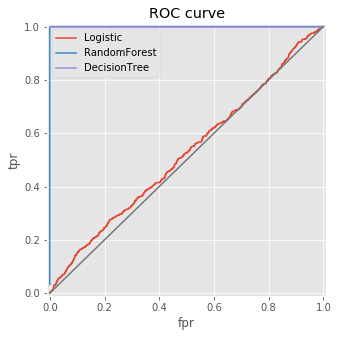

In [65]:
# Потроить roc-кривые всех можелей на одном графике
# Вывести roc_auc каждой моделе
# Подпишите оси и линии

## Your Code Here
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve

predict_proba_Logistic = model_Logistic.predict_proba(X_test)
fpr_Logistic, tpr_Logistic, thresholds_Logistic = roc_curve(y_test, predict_proba_Logistic[:,1])


predict_proba_RandomForest = model_RandomForest.predict_proba(X_test)
fpr_RandomForest, tpr_RandomForest, thresholds_RandomForest = roc_curve(y_test, predict_proba_RandomForest[:,1])

predict_proba_DecisionTree = model_DecisionTree.predict_proba(X_test)
fpr_DecisionTree, tpr_DecisionTree, thresholds_DecisionTree = roc_curve(y_test, predict_proba_DecisionTree[:,1])


plt.figure(figsize=(5, 5))
plt.plot(fpr_Logistic, tpr_Logistic, label="Logistic")         # ОТРИСОВКА Logistic 
plt.plot(fpr_RandomForest, tpr_RandomForest, label="RandomForest") # ОТРИСОВКА RandomForest 
plt.plot(fpr_DecisionTree, tpr_DecisionTree, label="DecisionTree") # ОТРИСОВКА DecisionTree 

plt.legend()

plt.plot([0, 1], [0, 1])  # ОТРИСОВКА ПРЯМОЙ НАКЛОННОЙ ЛИНИИ 
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.grid(True)
plt.title('ROC curve')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))

### то ли данные не те, а то ли что-то не то получилось... (

In [66]:
from sklearn.cross_validation import cross_val_score
# Сделать k-fold (10 фолдов) кросс-валидацию каждой модели
# И посчитать средний roc_auc

## Your Code Here


### Я так понял, это ДЗ не только по 2-й ле3кции? Мы же этого не проходили.

In [71]:
# Взять лучшую модель и сделать предсказания (с вероятностями (!!!)) для test выборки

# predict = 
## Your Code Here



### Я так понял предсказать надо для df_test_preproc ?

In [67]:
# Модель инициализировать не надо
# обучать насколько понимаю - тоже не надо


In [ ]:
# Померить roc_auc на тесте
# Вывести текстом и на графике =)

## Your Code Here

### Больше обязательных заданий нет, но ниже вы можете провести исследование, поиграться с данными
### Это возможность написать код, который я посмотрю и в случае чего откомметирую. ;)
### Это не оценивается и остается на ваше усмотрение. Просто дополнительная возможность

In [ ]:
### И далее ;)